Recommendation System Using Customer Data

In [43]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [44]:
whole_sale_company = pd.read_csv('wholesale_companies.csv')
whole_sale_customer = pd.read_csv('wholesale_customers.csv')
whole_sale_transactions = pd.read_csv('wholesale_transactions.csv')

In [45]:
whole_sale_company.head()


,company_id,name,location,industry_type,inventory_value
0,314,"Reed, Hood and King",Larryfurt,Electronics,3163898.22
1,593,Wiggins-Allen,Sarahland,Food Wholesale,6250955.35
2,571,Hardy-Williams,Wernermouth,Electronics,2992219.73
3,220,Miller Inc,South Nicole,Food Wholesale,1496112.21
4,551,"Jones, Simmons and Fischer",Williamsburgh,Food Wholesale,9350746.30


In [46]:
whole_sale_customer.head()

,customer_id,company_id,name,business_type,credit_limit,location
0,6014,220,Ryan Ramirez,Distribution,48467.87,Virginiaville
1,6563,593,Lisa Mccormick,Distribution,43684.03,Palmermouth
2,6392,593,Denise Smith,Retail,38196.82,Lake Robert
3,3786,314,Noah Keller,Distribution,25373.43,North Paulview
4,2968,593,Krystal Hall,Distribution,35312.79,Lake Marie


In [47]:
whole_sale_transactions.head()

,transaction_id,company_id,customer_id,transaction_date,item_code,item_name,quantity,unit_price,total_amount
0,418824,314,6563,21/04/2024,BC-9250,Let,94,181.55,17065.70
1,425438,551,5859,06/12/2023,bN-3536,Ground,89,101.01,8989.89
2,263568,551,4644,21/01/2024,Mc-7112,Drop,10,13.73,137.30
3,780508,551,4931,19/01/2024,ls-0866,Industry,92,102.49,9429.08
4,561807,220,8285,10/03/2024,kg-8027,Recent,61,167.93,10243.73


In [48]:
print(whole_sale_company.columns)
print(whole_sale_customer.columns)
print(whole_sale_transactions.columns)


Index(['company_id', 'name', 'location', 'industry_type', 'inventory_value'], dtype='object')
Index(['customer_id', 'company_id', 'name', 'business_type', 'credit_limit',
       'location'],
      dtype='object')
Index(['transaction_id', 'company_id', 'customer_id', 'transaction_date',
       'item_code', 'item_name', 'quantity', 'unit_price', 'total_amount'],
      dtype='object')


In [49]:
print(whole_sale_transactions.shape,
whole_sale_customer.shape,
whole_sale_company.shape , sep =' ')

(400, 9) (100, 6) (5, 5)


In [50]:
print(
whole_sale_transactions.isnull().sum(),
whole_sale_customer.isnull().sum(),
whole_sale_company.isnull().sum() , sep =' ')

transaction_id      0
company_id          0
customer_id         0
transaction_date    0
item_code           0
item_name           0
quantity            0
unit_price          0
total_amount        0
dtype: int64 customer_id      0
company_id       0
name             0
business_type    0
credit_limit     0
location         0
dtype: int64 company_id         0
name               0
location           0
industry_type      0
inventory_value    0
dtype: int64


In [51]:
print(
whole_sale_transactions.isna().sum(),
whole_sale_customer.isna().sum(),
whole_sale_company.isna().sum() , sep =' ')

transaction_id      0
company_id          0
customer_id         0
transaction_date    0
item_code           0
item_name           0
quantity            0
unit_price          0
total_amount        0
dtype: int64 customer_id      0
company_id       0
name             0
business_type    0
credit_limit     0
location         0
dtype: int64 company_id         0
name               0
location           0
industry_type      0
inventory_value    0
dtype: int64


In [52]:
merged_data = whole_sale_transactions.merge(whole_sale_company, on='company_id').merge(whole_sale_customer, on='customer_id')
merged_data.head(3)

,transaction_id,company_id_x,customer_id,transaction_date,item_code,item_name,quantity,unit_price,total_amount,name_x,location_x,industry_type,inventory_value,company_id_y,name_y,business_type,credit_limit,location_y
0,418824,314,6563,21/04/2024,BC-9250,Let,94,181.55,17065.70,"Reed, Hood and King",Larryfurt,Electronics,3163898.22,593,Lisa Mccormick,Distribution,43684.03,Palmermouth
1,425438,551,5859,06/12/2023,bN-3536,Ground,89,101.01,8989.89,"Jones, Simmons and Fischer",Williamsburgh,Food Wholesale,9350746.30,571,Thomas Allen,Distribution,6146.12,Knappland
2,263568,551,4644,21/01/2024,Mc-7112,Drop,10,13.73,137.30,"Jones, Simmons and Fischer",Williamsburgh,Food Wholesale,9350746.30,314,Julian Savage,Distribution,22671.37,Millerton


In [53]:
merged_data.columns

Index(['transaction_id', 'company_id_x', 'customer_id', 'transaction_date',
       'item_code', 'item_name', 'quantity', 'unit_price', 'total_amount',
       'name_x', 'location_x', 'industry_type', 'inventory_value',
       'company_id_y', 'name_y', 'business_type', 'credit_limit',
       'location_y'],
      dtype='object')

In [54]:
len(merged_data.columns)

18

In [55]:
merged_data = merged_data.rename(columns={
    'company_id_x': 'company_id',
    'name_x': 'company_name',
    'location_x': 'company_location',
    'name_y': 'customer_name',
    'location_y': 'customer_location'
})

In [56]:
customer_profiles = merged_data[['customer_id', 'item_name', 'quantity', 'total_amount','inventory_value', 'business_type', 'credit_limit', 'customer_location']]
customer_profiles.head()

,customer_id,item_name,quantity,total_amount,inventory_value,business_type,credit_limit,customer_location
0,6563,Let,94,17065.70,3163898.22,Distribution,43684.03,Palmermouth
1,5859,Ground,89,8989.89,9350746.30,Distribution,6146.12,Knappland
2,4644,Drop,10,137.30,9350746.30,Distribution,22671.37,Millerton
3,4931,Industry,92,9429.08,9350746.30,Distribution,45480.11,Cassandraview
4,8285,Recent,61,10243.73,1496112.21,Distribution,22488.48,Davidberg


In [57]:
customer_item_matrix = customer_profiles.pivot_table(index='customer_id', columns='item_name', values='quantity', fill_value=0)
customer_item_matrix.head()

item_name,Above,Accept,According,Account,Across,Adult,Again,Agency,Agree,Ahead,...,Woman,Word,Worker,World,Worry,Write,Yeah,Yet,Your,Yourself
customer_id,,,,,,,,,,,,,,,,,,,,,
2121,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2223,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2330,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2361,0.0,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2386,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


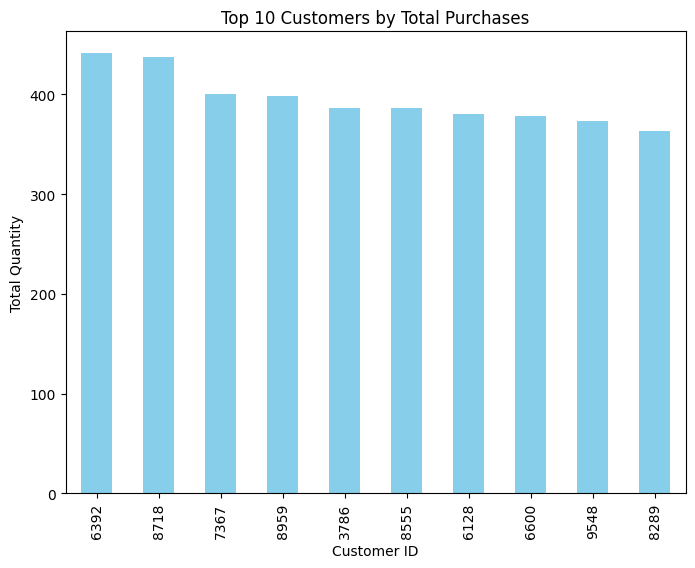

In [71]:
# Top 10 customers by total transaction quantity
top_customers = customer_item_matrix.sum(axis=1).sort_values(ascending=False).head(10)

plt.figure(figsize=(8, 6))
top_customers.plot(kind="bar", color="skyblue")
plt.title("Top 10 Customers by Total Purchases")
plt.xlabel("Customer ID")
plt.ylabel("Total Quantity")
plt.show()


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [59]:
customer_profiles['item_string'] = customer_profiles.groupby('customer_id')['item_name'].transform(lambda x: ' '.join(x))
customer_profiles = customer_profiles[['customer_id', 'item_string']].drop_duplicates()

vectorizer = TfidfVectorizer()
item_vectors = vectorizer.fit_transform(customer_profiles['item_string'])
print(item_vectors)


<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 399 stored elements and shape (98, 322)>
  Coords	Values
  (0, 140)	0.42388738475590515
  (0, 263)	0.46211072630182415
  (0, 290)	0.42388738475590515
  (0, 0)	0.46211072630182415
  (0, 118)	0.46211072630182415
  (1, 111)	0.43170676396336444
  (1, 167)	0.3959982764787493
  (1, 139)	0.3959982764787493
  (1, 181)	0.3959982764787493
  (1, 183)	0.43170676396336444
  (1, 103)	0.3959982764787493
  (2, 75)	0.4137529159714747
  (2, 247)	0.4137529159714747
  (2, 314)	0.4137529159714747
  (2, 196)	0.4137529159714747
  (2, 308)	0.4137529159714747
  (2, 45)	0.3795294753052908
  (3, 123)	0.46211072630182415
  (3, 116)	0.42388738475590515
  (3, 223)	0.42388738475590515
  (3, 154)	0.46211072630182415
  (3, 251)	0.46211072630182415
  (4, 215)	0.4363073533355638
  (4, 51)	0.4756506449391691
  (4, 291)	0.40839284370387313
  :	:
  (85, 137)	1.0
  (86, 17)	1.0
  (87, 67)	1.0
  (88, 291)	0.651427726038502
  (88, 286)	0.7587106943679564
  (89, 167

C:\Users\felix\AppData\Local\Temp\ipykernel_29728\3993520949.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  customer_profiles['item_string'] = customer_profiles.groupby('customer_id')['item_name'].transform(lambda x: ' '.join(x))


In [60]:
customer_profiles['item_string']

0           Let Strong Trouble Above Hundred
1           Ground Next Leg Owner Party Fund
2      Drop Size Worker Political Wide Class
3            Industry How Road Military Soon
4         Recent Commercial TRUE Accept They
                       ...                  
272                             Give Example
282                                     Line
288          Individual Property Clearly Leg
329                                    Claim
350                                  Account
Name: item_string, Length: 98, dtype: object

In [61]:
similarity_matrix = cosine_similarity(item_vectors, item_vectors)
print(similarity_matrix)



[[1.         0.         0.         ... 0.         0.         0.        ]
 [0.         1.         0.         ... 0.18928108 0.         0.        ]
 [0.         0.         1.         ... 0.         0.         0.        ]
 ...
 [0.         0.18928108 0.         ... 1.         0.         0.        ]
 [0.         0.         0.         ... 0.         1.         0.        ]
 [0.         0.         0.         ... 0.         0.         1.        ]]


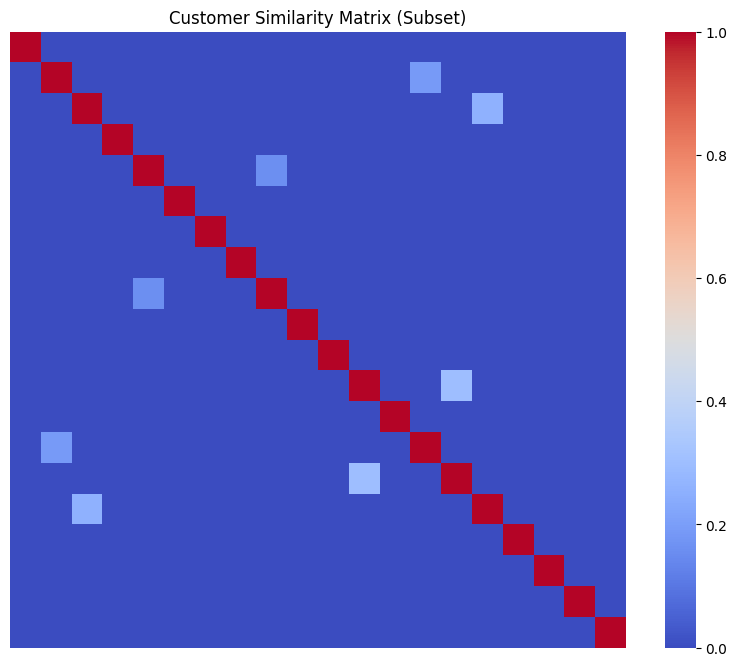

In [72]:
# Similarity matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(similarity_matrix[:20, :20], cmap="coolwarm", square=True, xticklabels=False, yticklabels=False)
plt.title("Customer Similarity Matrix (Subset)")
plt.show()


In [62]:
similarity_df = pd.DataFrame(similarity_matrix, index=customer_profiles['customer_id'], columns=customer_profiles['customer_id'])

In [63]:
similarity_df

customer_id,6563,5859,4644,4931,8285,3873,7367,4130,7876,7143,...,9602,3347,2386,9599,6801,3580,2623,3934,5085,2361
customer_id,,,,,,,,,,,,,,,,,,,,,
6563,1.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
5859,0.0,1.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.215492,0.0,0.0,0.0,0.0,0.0,0.189281,0.0,0.0
4644,0.0,0.000000,1.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
4931,0.0,0.000000,0.0,1.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
8285,0.0,0.000000,0.0,0.0,1.0,0.0,0.000000,0.0,0.158626,0.0,...,0.266038,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3580,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,1.0,0.0,0.000000,0.0,0.0
2623,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,1.0,0.000000,0.0,0.0
3934,0.0,0.189281,0.0,0.0,0.0,0.0,0.181409,0.0,0.000000,0.0,...,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,1.000000,0.0,0.0


In [69]:
def get_recommendations(customer_id, top_n=5, min_inventory=0):
    if customer_id not in similarity_df.index:
        raise ValueError(f"Customer ID {customer_id} not found in similarity matrix.")
    
    similar_customers = similarity_df[customer_id].sort_values(ascending=False).index[1:top_n+1]
    recommended_items = customer_item_matrix.loc[similar_customers].mean(axis=0).sort_values(ascending=False)
    
    available_items = merged_data[merged_data['inventory_value'] >= min_inventory]['item_name'].unique()
    filtered_recommendations = [item for item in recommended_items.index if item in available_items]
    
    top_recommendations = filtered_recommendations[:top_n]
    scores = recommended_items[top_recommendations]
    

    plt.figure(figsize=(8, 6))
    sns.barplot(x=scores.values, y=scores.index, palette="magma",hue=scores)
    plt.title(f"Top {top_n} Recommendations for Customer {customer_id}")
    plt.xlabel("Recommendation Score")
    plt.ylabel("Item")
    plt.show()
    
    return top_recommendations


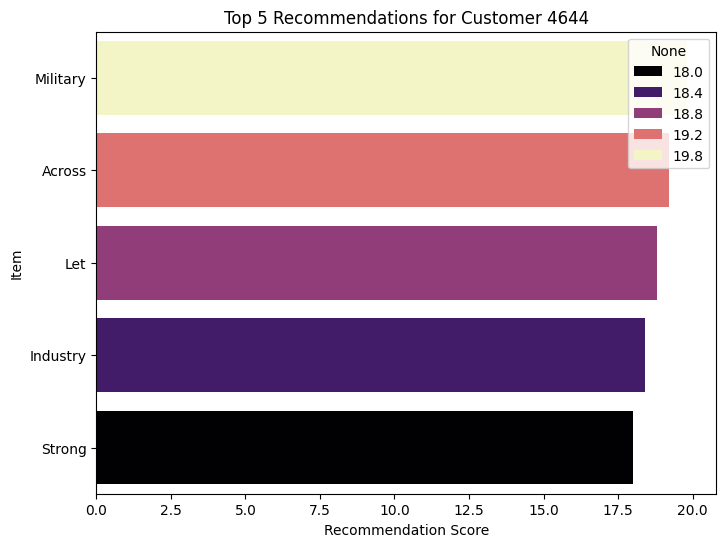

['Military', 'Across', 'Let', 'Industry', 'Strong']


In [75]:

recommendations = get_recommendations(customer_id=4644)
print(recommendations)